In [19]:
from sklearn.svm import SVC
import numpy as np
from sklearn import preprocessing
import sklearn
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from numpy import *
import pickle

In [2]:
#Load features of validation samples
tmp = np.load("valid_samples_feats_matrix_Gabor.npy")
#valid_samples_feats_matrix_GLCM = np.load("valid_samples_feats_matrix_GLCM.npy")
#valid_samples_feats_matrix_glcm_gabor = np.concatenate((valid_samples_feats_matrix_GLCM,valid_samples_feats_matrix_Gabor), axis=1)

In [3]:
train_samples_feats_matrix_Gabor_norm = tmp[0:3000, :]

In [4]:
valid_samples_feats_matrix_Gabor_norm = tmp[3000:6000, :]

In [5]:
train_samples_feats_matrix_Gabor_abn = tmp[6000:8000, :]

In [6]:
valid_samples_feats_matrix_Gabor_abn = tmp[8000:10000, :]

In [7]:
train_samples_feats_matrix_Gabor = np.concatenate((train_samples_feats_matrix_Gabor_norm, train_samples_feats_matrix_Gabor_abn), axis = 0)

In [8]:
valid_samples_feats_matrix_Gabor = np.concatenate((valid_samples_feats_matrix_Gabor_norm, valid_samples_feats_matrix_Gabor_abn), axis =0)

In [ ]:
#Load features of validation samples
test_samples_feats_matrix_Gabor = np.load("test_samples_feats_matrix_Gabor.npy")

In [12]:
#Ground truth
SVM_y1 = np.repeat(1, 3000) #normal
SVM_y2 = np.repeat(0, 2000) #abnormal
SVM_y = np.concatenate((SVM_y1,SVM_y2))

In [13]:
clf = SVC(C=60, cache_size=200, class_weight=None, coef0=0.0,
          decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf')
clf.fit(train_samples_feats_matrix_Gabor, SVM_y)

SVC(C=60, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [14]:
#Predict labels of new data points
y_predict = clf.predict(valid_samples_feats_matrix_Gabor)
#print ("number of samples detected as outliers", y_predict[y_predict == 0].size)
#print ("detected as normal", y_predict[y_predict == 1].size)

In [15]:
y_predict_score = clf.decision_function(valid_samples_feats_matrix_Gabor)

In [16]:
f1_binary = sklearn.metrics.f1_score(SVM_y, y_predict, pos_label= 0, average = 'binary')
f1_macro = sklearn.metrics.f1_score(SVM_y, y_predict, average = 'macro')
Math_Cof = sklearn.metrics.matthews_corrcoef(SVM_y, y_predict) 
auc = sklearn.metrics.roc_auc_score(SVM_y, y_predict_score)
print ("f1_binary: ", f1_binary, "f1_macro: ", f1_macro , " auc: ", auc, "Matthews: ", Math_Cof)

('f1_binary: ', 0.75529542920847259, 'f1_macro: ', 0.80918233718689381, ' auc: ', 0.89099266666666666, 'Matthews: ', 0.63121376517421512)


In [17]:
OC_valid_samples_feats_matrix_gabor = np.load("valid_samples_feats_matrix_Gabor.npy")

In [20]:
svm_model = pickle.load( open( "SVM_Gabor_[0.2, 0.1]", "rb" ))

In [22]:
#Ground truth
OC_y1 = np.repeat(+1, 6000) #normal
OC_y2 = np.repeat(-1, 4000) #abnormal
OC_y = np.concatenate((OC_y1,OC_y2))

In [25]:
OC_y_predict = svm_model.predict(OC_valid_samples_feats_matrix_gabor)

In [26]:
OC_y_predict_score = svm_model.decision_function(OC_valid_samples_feats_matrix_gabor)

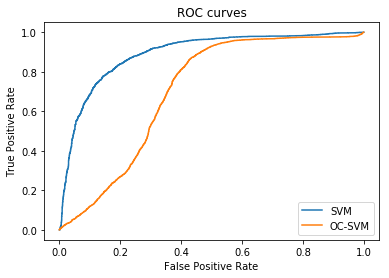

In [27]:
import matplotlib.pyplot as pl
import matplotlib
from skimage import io


fpr,tpr,thresh = sklearn.metrics.roc_curve(SVM_y,y_predict_score)
OC_fpr,OC_tpr,OC_thresh = sklearn.metrics.roc_curve(OC_y,OC_y_predict_score)

f,ax = pl.subplots(1,1)
ax.plot(fpr,tpr,label="SVM")
ax.plot(OC_fpr,OC_tpr,label="OC-SVM")

ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.set_title("ROC curves")
ax.legend(loc="lower right")

io.show()

In [28]:
f.savefig('SVM-vs-OCSVM_Gabor.png')